In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [23]:
data_losses = pd.read_csv('G:\\Bootcamp\Materi\\9. Data Wrangling\\Automobile\\automobile-losses.csv')

In [24]:
data_risk = pd.read_csv('G:\\Bootcamp\Materi\\9. Data Wrangling\\Automobile\\automobile-risk.csv')

In [25]:
data_spec = pd.read_csv('G:\\Bootcamp\Materi\\9. Data Wrangling\\Automobile\\automobile-spec.csv')

In [75]:
data_losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [76]:
data_risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [28]:
data_spec.shape

(205, 25)

In [77]:
data_spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [78]:
data_spec.columns

Index(['ID', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheel', 'engine-loc', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'cylinder', 'engine-size', 'fuel-system',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [31]:
data_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [32]:
data_spec.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

## Part 1

### 1. Join 3 tables using ID as key

In [33]:
data = pd.merge(data_losses, data_risk, how='outer')
data = pd.merge(data_spec, data, how='outer')
data.head(10)

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2
5,6,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,NaN,2
6,7,audi,gas,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,158.0,1
7,8,audi,gas,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,NaN,1
8,9,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,158.0,1
9,10,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,NaN,0


### 2. Quick-look (dimension, data type, head/tail, summary statistics, etc)

In [34]:
#Dimension
data.shape #ada 205 rows dan 27 columns

(205, 27)

In [35]:
data.ndim # 2 dimension

2

In [36]:
#Data Types
data.dtypes

ID                     int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
normalized-losses    float64
symboling              int64
dtype: object

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [38]:
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


In [39]:
data.tail()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
200,201,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,95.0,-1
201,202,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,95.0,-1
202,203,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,95.0,-1
203,204,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,95.0,-1
204,205,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0,95.0,-1


In [40]:
data['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

### 3. Identify missing value. If any, how will you handle it?

In [41]:
count_missing = data.isnull().sum()
count_missing

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
normalized-losses    41
symboling             0
dtype: int64

In [42]:
percentage = round(count_missing/len(data)*100,2)
percentage

ID                    0.00
make                  0.00
fuel-type             0.00
aspiration            0.00
num-of-doors          0.49
body-style            0.00
drive-wheel           0.00
engine-loc            0.00
wheel-base            0.00
length                0.00
width                 0.00
height                0.00
curb-weight           0.00
engine-type           0.00
cylinder              0.00
engine-size           0.00
fuel-system           0.00
bore                  1.95
stroke                1.95
compression-ratio     0.00
horsepower            0.98
peak-rpm              0.98
city-mpg              0.00
highway-mpg           0.00
price                 1.95
normalized-losses    20.00
symboling             0.00
dtype: float64

ada 7 kolom yang beberapa datanya missing. yang saya lakukan:
1. di kolom normalized-losses saya drop kolomnya karena nilai yang kosong sangat banyak
2. data yang hilang di kolom 'num-of-doors' saya drop
3. data yang missing di bore, stroke, horsepower, peak-rpm saya isi dengan median dari data tsb
4. data yang missing di price dan num-of-doors saya drop

In [43]:
data = data.drop(columns='normalized-losses')

In [44]:
data['num-of-doors'].head()

0     two
1     two
2     two
3    four
4    four
Name: num-of-doors, dtype: object

In [45]:
bore_median = data['bore'].median()
stroke_median = data['stroke'].median()
horsepower_median = data['horsepower'].median()
peak_median = data['peak-rpm'].median()

In [46]:
data = data.fillna({
    'bore':bore_median,
    'stroke':stroke_median,
    'horsepower':horsepower_median,
    'peak-rpm':peak_median
})

In [47]:
data.shape

(205, 26)

In [48]:
data = data.dropna()

In [49]:
data.shape

(200, 26)

In [50]:
data.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
symboling            0
dtype: int64

## 5. Perform visualization using at least 5 difference visualization technique (barplot, scatter plot, area, boxplot, pie chart, line chart, etc)

### Univariate Analysis

In [62]:
data.columns

Index(['ID', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheel', 'engine-loc', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'cylinder', 'engine-size', 'fuel-system',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price', 'symboling'],
      dtype='object')

In [51]:
data.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


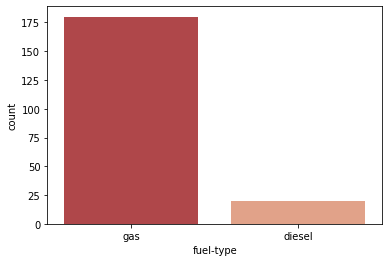

In [52]:
sns.set_palette("RdGy")
sns.countplot(data['fuel-type'])

Dapat dilihat bahwa bahan bakar mobil yang paling banyak digunakan adalah GAS

In [53]:
num_doors = data.groupby('num-of-doors').ID.count().reset_index()
num_doors = num_doors.drop([0])
num_doors = num_doors.rename(columns=
    {'ID':'Count'}
)
num_doors

,num-of-doors,Count
1,four,113
2,two,86


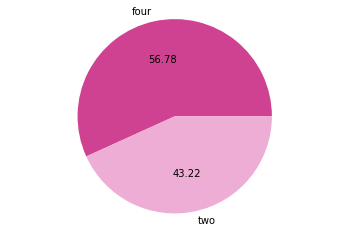

In [85]:
sns.set_palette("PiYG")
plt.pie(num_doors['Count'], labels=num_doors['num-of-doors'], autopct='%.2f')
plt.axis('equal')
plt.show()

jumlah mobil dengan pintu empat masih mendominasi namun selisihnya dengan jumlah pintu 2 tidak terlalu signifikan

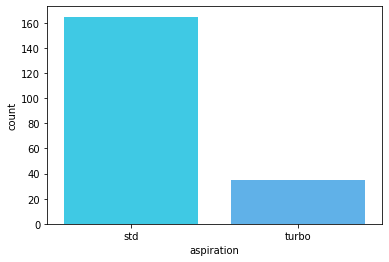

In [95]:
sns.set_palette("cool")
sns.countplot(data['aspiration'])

Jumlah mobil yang memiliki aspiration std jauh lebih banyak daripada yang turbo

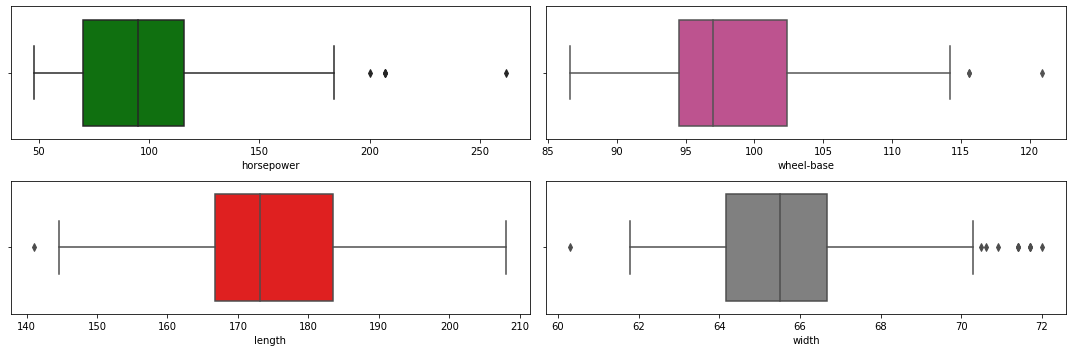

In [56]:
f = plt.figure(figsize=(15,5))
f.add_subplot(2,2,1)
sns.boxplot(data['horsepower'], color='green')

f.add_subplot(2,2,2)
sns.boxplot(data['wheel-base'])

f.add_subplot(2,2,3)
sns.boxplot(data['length'], color='red')

f.add_subplot(2,2,4)
sns.boxplot(data['width'], color='gray')

f.tight_layout()

dari keempat variabel ternyata rata-rata jumlah outliernya masih rendah

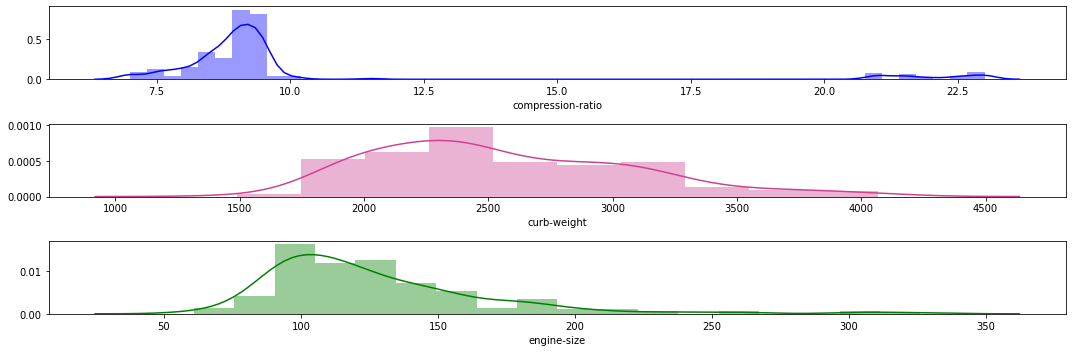

In [57]:
g = plt.figure(figsize=(15,5))
g.add_subplot(3,1,1)
sns.distplot(data['compression-ratio'], kde=True, color='blue')

g.add_subplot(3,1,2)
sns.distplot(data['curb-weight'])

g.add_subplot(3,1,3)
sns.distplot(data['engine-size'], kde=True, color='green')

g.tight_layout()

1. untuk compression-ratio sebagian besar distribusi data masih berada di antara nilai 7.5 - 10 (Right Skew)
2. untuk curb-weight sebagian besar distribusi data masih berada di antara nilai 2000 - 3500 (Symmetric)
3. untuk engine-size sebagian besar distribusi data masih berada di antara nilai 75 - 160 (Right Skew)

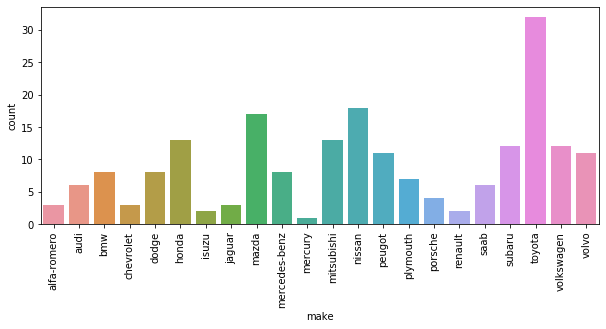

<Figure size 432x288 with 0 Axes>

In [109]:
plt.figure(figsize=(10,4))
plot = sns.countplot(data['make'])
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()
plt.tight_layout()

Jumlah perusahaan pembuat mobil paling banyak adalah dari Toyota, Mazda, dan Nissan

### Bivariate Analysis

In [60]:
data.corr().style.background_gradient().set_precision(2)
#mencari korelasi antar variabel

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
ID,1,0.12,0.15,0.038,0.25,0.061,-0.052,0.24,-0.16,0.14,-0.024,-0.19,0.027,0.019,-0.12,-0.16
wheel-base,0.12,1,0.88,0.81,0.59,0.78,0.57,0.49,0.16,0.25,0.37,-0.36,-0.47,-0.54,0.58,-0.54
length,0.15,0.88,1,0.86,0.49,0.88,0.68,0.61,0.13,0.16,0.58,-0.28,-0.67,-0.7,0.69,-0.37
width,0.038,0.81,0.86,1,0.3,0.87,0.73,0.54,0.19,0.19,0.62,-0.24,-0.64,-0.68,0.75,-0.24
height,0.25,0.59,0.49,0.3,1,0.3,0.071,0.18,-0.062,0.26,-0.087,-0.31,-0.051,-0.11,0.13,-0.55
curb-weight,0.061,0.78,0.88,0.87,0.3,1,0.85,0.64,0.17,0.15,0.76,-0.28,-0.75,-0.8,0.83,-0.23
engine-size,-0.052,0.57,0.68,0.73,0.071,0.85,1,0.57,0.2,0.027,0.82,-0.25,-0.65,-0.68,0.87,-0.11
bore,0.24,0.49,0.61,0.54,0.18,0.64,0.57,1,-0.053,-0.0021,0.57,-0.27,-0.58,-0.59,0.54,-0.14
stroke,-0.16,0.16,0.13,0.19,-0.062,0.17,0.2,-0.053,1,0.19,0.094,-0.058,-0.036,-0.037,0.084,-0.0047
compression-ratio,0.14,0.25,0.16,0.19,0.26,0.15,0.027,-0.0021,0.19,1,-0.21,-0.43,0.33,0.27,0.069,-0.18


hubungan yang ingin dicari
1. price - engine-size
2. price - horsepower
3. price - highway-mpg
4. length - horsepower
5. engine size - height

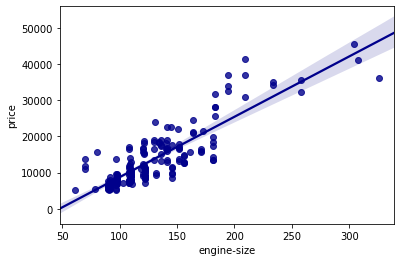

In [89]:
# Engine size vs Price
sns.regplot(data=data, x='engine-size', y='price', color='darkblue')

dapat dilihat bahwa ada korelasi positif antara harga mobil dengan ukuran mesin. semakin besar ukuran mesin maka semakin mahal harga mobil

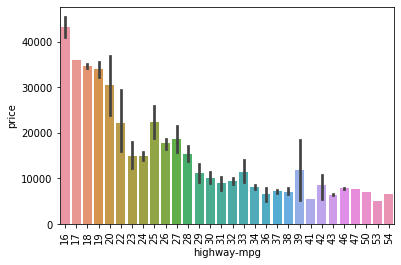

In [80]:
# Highway-MPG and Price
plot = sns.barplot(data=data, x='highway-mpg', y='price')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

ternyata highway-mpg dan price memiliki korelasi yang negatif yaitu semakin besar highway-mpg maka semakin murah juga harga mobil

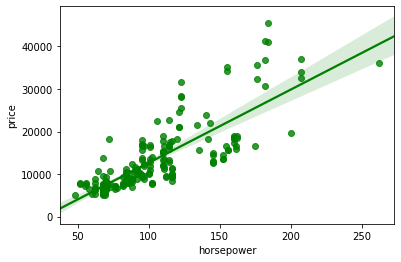

In [90]:
# Horsepower and Price
sns.regplot(data=data, x='horsepower', y='price', color='green')

korelasi positif terjadi antara horsepower dengan price dimana dengan bertambhanya horsepower maka price mobil akan semakin naik

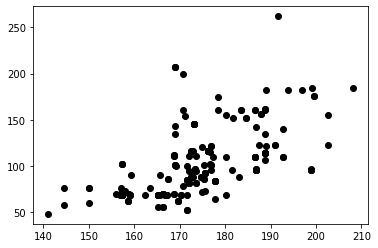

In [92]:
# Length and Horsepower
plt.scatter(data=data, x='length', y='horsepower', color='black')

korelasi positif terjadi antara horsepower dengan panjang dari mobilnya dimana dengan bertambhanya horsepower maka panjang mobil akan semakin bertambah

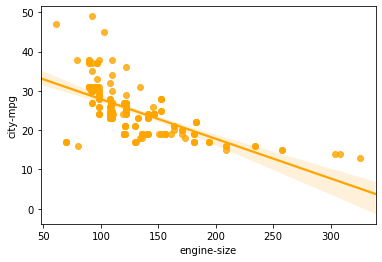

In [104]:
# Engine Size and Height
sns.regplot(data=data, x='engine-size', y='city-mpg', color='orange')

Dapat dilihat bahwa variabel city-mpg dan engine-size memiliki korelasi yang berkebalikan dimana ketika engine-size semakin tinggi maka nilai city-mpg akan semakin rendah

## Part 2

### 1. Car brand with highest price

In [66]:
data.nlargest(1, 'price')

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
74,75,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,...,mpfi,3.8,3.35,8.0,184.0,4500.0,14,16,45400.0,1


Car brand with the highst price is Mercedes-Benz with the price 45400. the details is above

### 2. Maximum horsepower for car with 6 cylinder engine

In [68]:
data[data['cylinder']=='six'].nlargest(5, 'horsepower')

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
126,127,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,32528.0,3
127,128,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,34028.0,3
128,129,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,...,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0,3
105,106,nissan,gas,turbo,two,hatchback,rwd,front,91.3,170.7,...,mpfi,3.43,3.27,7.8,200.0,5200.0,17,23,19699.0,3
15,16,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,...,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0,0


the maximum of horsepower with 6 cylinder is 207 with porsche as the makers

### 3. Average peak-rpm for ‘turbo’ style aspiration car

In [74]:
data[data['aspiration']=='turbo']['peak-rpm'].mean()

4907.142857142857

In [70]:
data.groupby('aspiration')['peak-rpm'].mean()

aspiration
std      5160.909091
turbo    4907.142857
Name: peak-rpm, dtype: float64

jadi untuk Average peak-rpm for ‘turbo’ style aspiration car adalah 4907

### 4. Average price based on body-style

In [71]:
data.groupby('body-style').price.mean()

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14523.215054
wagon          12371.960000
Name: price, dtype: float64

rata rata garga berdasarkan style dari body mobil dapat dilihat diatas

### 5. Average price based on body-style only for Honda car (make=Honda)

In [72]:
data_honda = data[data['make']=='honda']

In [73]:
data_honda.groupby('body-style').price.mean()

body-style
hatchback    7054.428571
sedan        9945.000000
wagon        7295.000000
Name: price, dtype: float64

rata rata khusus untuk mobil honda berdasarkan style dari mobilnya bisa dilihat diatas